In [1]:
import tensorflow as tf
import tarfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" -O /tmp/flower_photos.tgz

--2020-10-15 13:26:58--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘/tmp/flower_photos.tgz’

/tmp/flower_photos. 100%[===================>] 218.21M  78.3MB/s    in 2.8s    

2020-10-15 13:27:01 (78.3 MB/s) - ‘/tmp/flower_photos.tgz’ saved [228813984/228813984]



In [3]:
data = tarfile.open('/tmp/flower_photos.tgz')
data.extractall('/tmp/')
data.close()

In [4]:
flower_dir = "/tmp/flower_photos"
daisy_dir = "/tmp/flower_photos/daisy"
dandelion_dir = "/tmp/flower_photos/dandelion"
roses_dir = "/tmp/flower_photos/roses"
sunflowers_dir = "/tmp/flower_photos/sunflowers"
tulips_dir = "/tmp/flower_photos/tulips"

daisy_images = os.listdir(daisy_dir)
dandelion_images = os.listdir(dandelion_dir)
roses_images = os.listdir(roses_dir)
sunflowers_images = os.listdir(sunflowers_dir)
tulips_images = os.listdir(tulips_dir)

print("Daisy Photos:     ", len(daisy_images))
print("Dandelion Photos: ", len(dandelion_images))
print("Rose Photos:      ", len(roses_images))
print("Sunflower Photos: ", len(sunflowers_images))
print("Tulip Photos:     ", len(tulips_images))

Daisy Photos:      633
Dandelion Photos:  898
Rose Photos:       641
Sunflower Photos:  699
Tulip Photos:      799


In [5]:
n_rows = 5
n_cols = 3

pic_index = 0

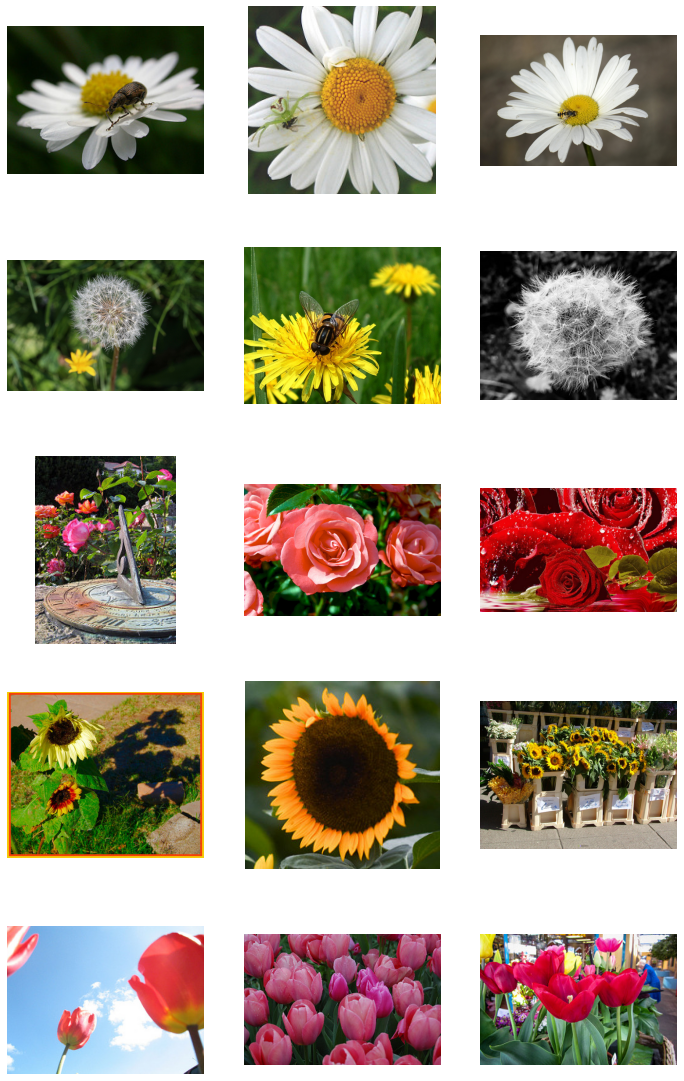

In [6]:
fig = plt.gcf()
fig.set_size_inches(n_cols * 4, n_rows * 4)
pic_index += 3

next_daisy = [os.path.join(daisy_dir, fname) for fname in daisy_images[pic_index-3:pic_index]]
next_dandelion = [os.path.join(dandelion_dir, fname) for fname in dandelion_images[pic_index-3:pic_index]]
next_roses = [os.path.join(roses_dir, fname) for fname in roses_images[pic_index-3:pic_index]]
next_sunflowers = [os.path.join(sunflowers_dir, fname) for fname in sunflowers_images[pic_index-3:pic_index]]
next_tulips = [os.path.join(tulips_dir, fname) for fname in tulips_images[pic_index-3:pic_index]]

for i, imgpath in enumerate(next_daisy+next_dandelion+next_roses+next_sunflowers+next_tulips):
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis("off")
    img = mpimg.imread(imgpath)
    plt.imshow(img)
plt.show()

In [7]:
img_size = 180

train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest",
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(flower_dir,
                                                    target_size=(img_size, img_size),
                                                    class_mode="categorical",
                                                    batch_size=32,
                                                    subset="training")

validation_generator = train_datagen.flow_from_directory(flower_dir,
                                                    target_size=(img_size, img_size),
                                                    class_mode="categorical",
                                                    batch_size=32,
                                                    subset="validation")

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [8]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,kernel_size=3, activation="relu", padding="same", input_shape=(img_size, img_size, 3)),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(32,kernel_size=3, activation="relu", padding="same"),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(64,kernel_size=3, activation="relu", padding="same"),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(5, activation="softmax")
])

model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

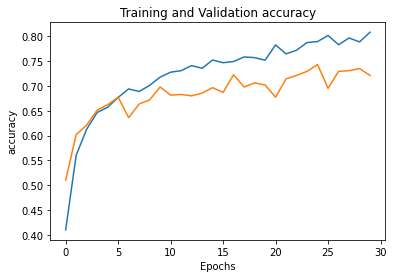

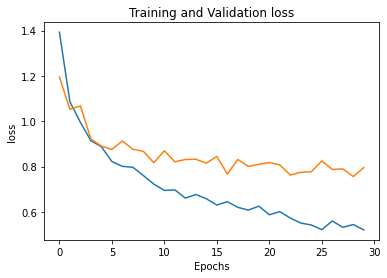

In [9]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title("Training and Validation " + string)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")